# Применение PCA для снижения размерности


В этом уроке мы воспользуемся для задачи снижения размерности готовым в sklearn алгоритмом PCA. Загрузим датасет для экспериментов:

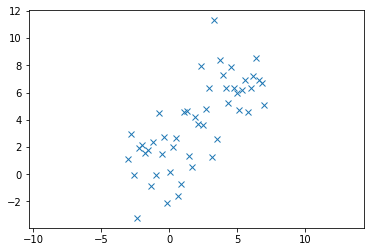

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

with open('eigen.pkl', 'rb') as f:
    X = pickle.load(f)

plt.plot(X[:,0], X[:,1], 'x')
plt.axis('equal')
plt.show()

Применяем алгоритм `sklearn.decomposition.PCA` к набору данных:

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1).fit(X)
X_pca = pca.transform(X)
X_pca[:10]

array([[5.28331909],
       [3.84284422],
       [5.88859559],
       [8.07409089],
       [4.16799935],
       [3.8592636 ],
       [4.17040423],
       [3.86884344],
       [5.65483844],
       [3.16278418]])

Мы сжали с помощью PCA двумерные данные в одномерный массив. 

![pca_arrays](https://248006.selcdn.ru/public/DS.%20Block%202.%20M8/pca_arrays.png)

Давайте визуализируем этот массив - для этого надо произвести обратное преобразование из одномерного массива в двумерный. Отобразим "восстановленные" данные на графике (вторая картинка - исходный, несжатый массив):

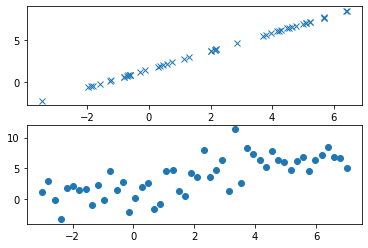

In [3]:
X_new = pca.inverse_transform(X_pca)

plt.figure(1)
plt.subplot(211)
plt.plot(X_new[:,0], X_new[:,1], 'x')

plt.subplot(212)
plt.plot(X[:,0], X[:,1], 'o')
plt.show()

Алгоритм PCA выявил, что переменная от $x_2$ линейным образом зависит от переменной $x_1$ - то есть вместо переменной $x_2$ можно использовать линейное преобразование $x_2 = x_1w_1 + w_0$ (эта переменная на первом графике). "Сжатые данные" представляют собой график линейной функции $x_2 = ax_1 + b$. 

Данные, представляли собой облако точек, но алгоритм PCA ужал их до одномерного случая. Другие интересные визуализации можно [глянуть по ссылке](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)

Как применять этот алгоритм на практике? PCA можно применить к любым данным, но как определить, что вам *действительно* нужно сжимать размерность?

* обучаете свой алгоритм (например, линейную регрессию) на исходных данных и вычисляете качество решения по RMSE (например)
* сжимаете данные с помощью PCA
* снова обучаете линейную регрессию с теми же параметрами, проверяете качество решения RMSE. Если качество выросло - PCA сжал данные "правильно", пропали шумы. Если качество уменьшилось - PCA сказывается негативно, вместо убирания шумов вы теряете часть информации

Остался один интересный вопрос: как подобрать, сколько главных компонент оставить? Воспользуйтесь процедурой GridSearch, с которой вы уже сталкивались в уроке про линейную регрессию: компонент нужно оставить столько, чтобы качество вашего алгоритма на отложенной выборке было максимальным.

Ну и еще скажу, что существует один подводный камень в PCA: плохо работает, когда переменные в разных масштабах, например: количество минут пользователя на сервисе (live time) и цена, которую он платит за подписку - цена намного меньше по абсолютным значением, чем количество минут. Выход: выполнять *Z-преобразование* переменных, с которым мы познакомились в уроке про линейную регрессию.